In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Dataset

In [2]:
kiva_loans= pd.read_csv('kiva_loans.csv')
kiva_loans

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


# Removing NA values

In [3]:
kiva_loans.dropna(inplace=True)

In [4]:
kiva_loans= kiva_loans.reset_index()

In [5]:
kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423081 entries, 0 to 423080
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               423081 non-null  int64  
 1   id                  423081 non-null  int64  
 2   funded_amount       423081 non-null  float64
 3   loan_amount         423081 non-null  float64
 4   activity            423081 non-null  object 
 5   sector              423081 non-null  object 
 6   use                 423081 non-null  object 
 7   country_code        423081 non-null  object 
 8   country             423081 non-null  object 
 9   region              423081 non-null  object 
 10  currency            423081 non-null  object 
 11  partner_id          423081 non-null  float64
 12  posted_time         423081 non-null  object 
 13  disbursed_time      423081 non-null  object 
 14  funded_time         423081 non-null  object 
 15  term_in_months      423081 non-nul

# Checking Null Values

In [6]:
kiva_loans.isnull().sum()[kiva_loans.isnull().sum()!=0]

Series([], dtype: int64)

In [7]:
kiva_loans.columns

Index(['index', 'id', 'funded_amount', 'loan_amount', 'activity', 'sector',
       'use', 'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

### Column -  use, country_code, region, partner_id,disbursed_time, funded_time, tags having Null Values.

**Looking at the columns in the dataset, we can find out some of the variables which can be of interest for us for framing a good  analytical business problem for Crowed Funding. The columns look as follows:**
1. Column descriptions::<br>
a. funded_amount: The amount disbursed by Kiva to the field agent(USD)<br>
b. loan_amount: The amount disbursed by the field agent to the borrower(USD)<br>
c. activity: More granular category<br>
d. sector: High level category<br>
e. use:Exact usage of loan amount<br>
f. country_code: ISO country code of country in which loan was disbursed<br>
g. country: Full country name of country in which loan was disbursed<br>
h. region: Full region name within the country<br>
i. currency: The currency in which the loan was disbursed<br>
j. partner_id:ID of partner organization<br>
k. posted_time:The time at which the loan is posted on Kiva by the field agent<br>
l. disbursed_time: The time at which the loan is disbursed by the field agent to the borrower<br>
m. funded_time: The time at which the loan posted to Kiva gets funded by lenders completely<br>
n. term_in_months: The duration for which the loan was disbursed in months<br>
o. lender_count: The total number of lenders that contributed to this loan<br>
p. tags:<br>
q. borrower_genders: Comma separated M,F letters, where each instance represents a single male/female in the group<br>
r. repayment_interval: Repayment Time<br>
s. date: Date<br>
<br>

# Amongst all country which country got the most loans?

In [8]:
 kiva_loans.groupby('country')['loan_amount'].sum().sort_values(ascending = False).reset_index().head(10)

,country,loan_amount
0,Philippines,33866800.0
1,Kenya,23902600.0
2,Peru,21222000.0
3,Paraguay,20141975.0
4,Bolivia,15774725.0
5,Cambodia,14885750.0
6,Tajikistan,11581175.0
7,Vietnam,11487275.0
8,Ecuador,11364775.0
9,Uganda,10565625.0


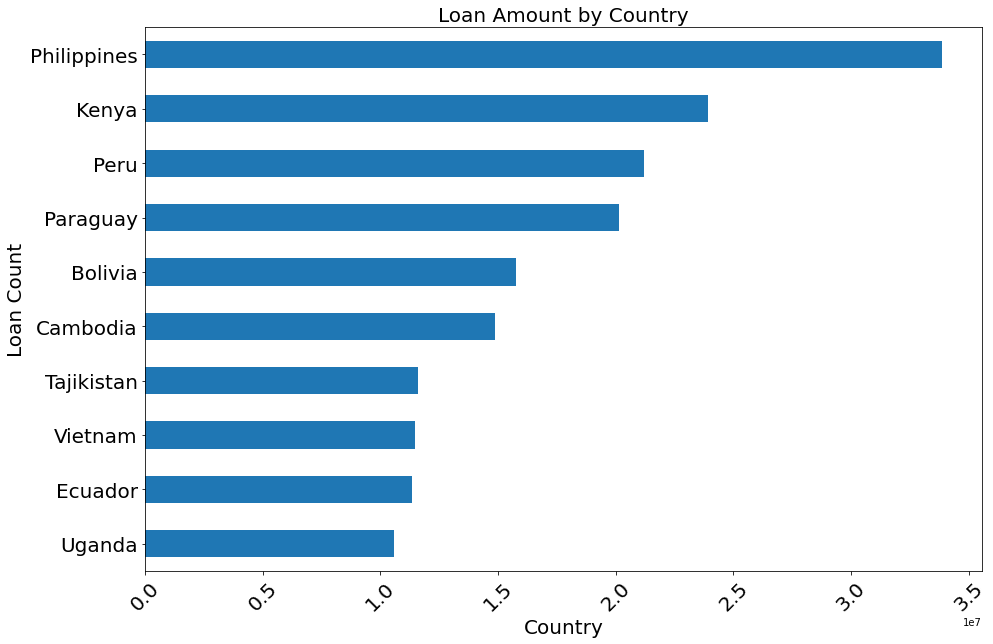

In [9]:
plt.figure(figsize=[15,10])
kiva_loans.groupby('country')['loan_amount'].sum().sort_values().tail(10).plot.barh();
plt.ylabel('Loan Count',fontsize = 20)
plt.title("Loan Amount by Country",fontsize = 20)
plt.xlabel('Country',fontsize = 20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()

### Philippines, Kenya, United States, Peru, Paraguay, El Salvador, Cambodia, Bolivia, Rwanda, Uganda are the Top 10 country got the Maximum loans.

# How the distribution of loan duration in months looks? What is the conclusion from it?

<Figure size 1080x504 with 0 Axes>

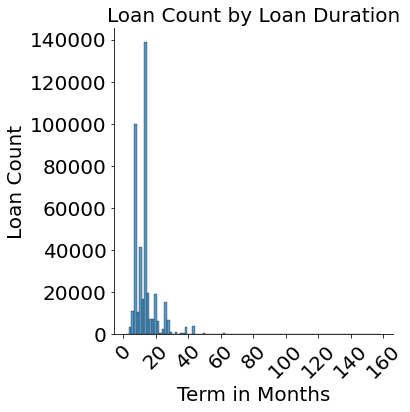

In [16]:
plt.figure(figsize=[15,7])
sns.displot(kiva_loans['term_in_months'],bins = 100)
plt.ylabel('Loan Count',fontsize = 20)
plt.xlabel('Term in Months',fontsize = 20)
plt.title("Loan Count by Loan Duration",fontsize = 20);
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()

(array([3.48604e+05, 6.09020e+04, 9.51900e+03, 2.25500e+03, 1.01900e+03,
        4.28000e+02, 1.41000e+02, 1.12000e+02, 7.80000e+01, 2.30000e+01]),
 array([  2. ,  17.6,  33.2,  48.8,  64.4,  80. ,  95.6, 111.2, 126.8,
        142.4, 158. ]),
 <BarContainer object of 10 artists>)

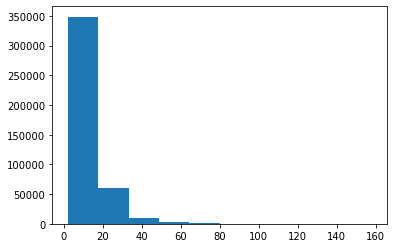

In [12]:
plt.hist(kiva_loans['term_in_months'])

### From above distribution we can see most loans are short term loans less than 24 months. So we can conclude that the maximum loan funded are short term loans.

#  Which is the most popular sectors in which maximum amount of loans are taken?

In [61]:
 kiva_loans.groupby('sector')['loan_amount'].sum().sort_values(ascending = False).reset_index().head(10)

,sector,loan_amount
0,Agriculture,98113450.0
1,Food,71769250.0
2,Retail,56459175.0
3,Services,27572525.0
4,Education,24681875.0
5,Clothing,23354150.0
6,Housing,14686775.0
7,Personal Use,11035300.0
8,Arts,8569950.0
9,Health,6863575.0


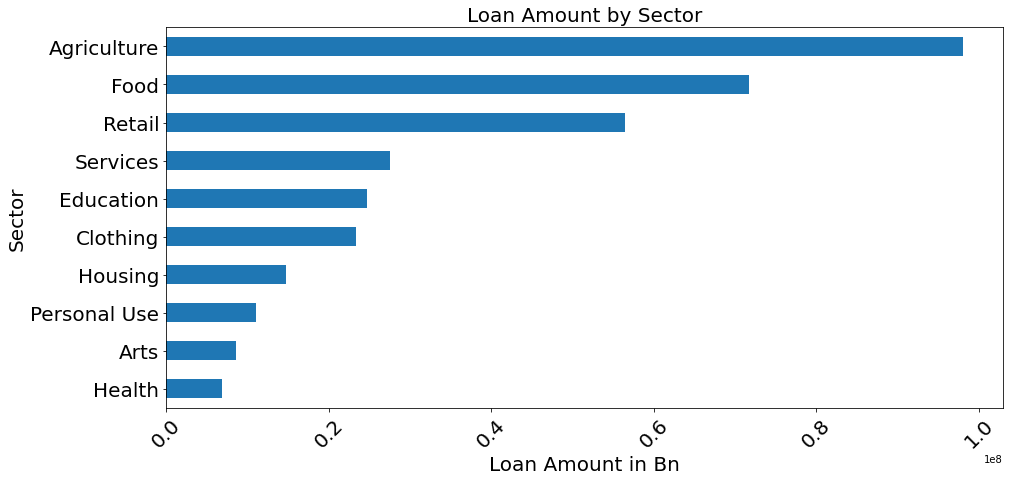

In [72]:
plt.figure(figsize=[15,7])
kiva_loans.groupby('sector')['loan_amount'].sum().sort_values().tail(10).plot.barh();
plt.xlabel('Loan Amount in Bn',fontsize = 20)
plt.ylabel("Sector",fontsize = 20);
plt.xticks(fontsize=20, rotation=45)
plt.title("Loan Amount by Sector",fontsize = 20)
plt.yticks(fontsize=20)
plt.show()

### Agriculture, Food, Retail, Services, Clothing, Education, Housing, Personal Use, Arts, Transportation are the most popular sectors in which loans are taken.

# What is the ratio of loan distribution gender wise?

In [64]:
def process_gender(x):
    
    if type(x) is float and np.isnan(x):
        return "NULL"
    genders = x.split(",")
    male_count = sum(g.strip() == 'male' for g in genders)
    female_count = sum(g.strip() == 'female' for g in genders)
    
    if(male_count > 0 and female_count > 0):
        return " Joint Male & Female"
    elif(female_count > 0):
        return "Female"
    elif (male_count > 0):
        return "Male"

In [65]:
kiva_loans.borrower_genders = kiva_loans.borrower_genders.apply(process_gender)

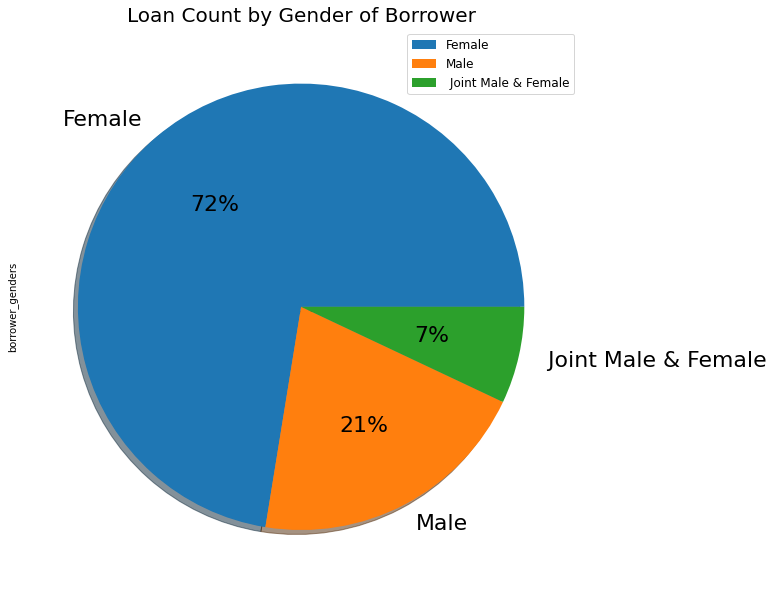

In [66]:
kiva_loans.borrower_genders.value_counts().plot(kind='pie',figsize=(10, 15),autopct='%.0f%%', shadow=True, textprops={'fontsize': 22});
plt.title("Loan Count by Gender of Borrower",fontsize = 20);
plt.xticks(fontsize=24, rotation=45)
plt.legend(fontsize=12)
plt.show()

### For female 73 %, Male 21%, Male & Female (Joint Account) 7% loan is funded. So, we can say maximum loan is funded to the Females 

# What is the loan count by Gender of Borrower Sector Wise?

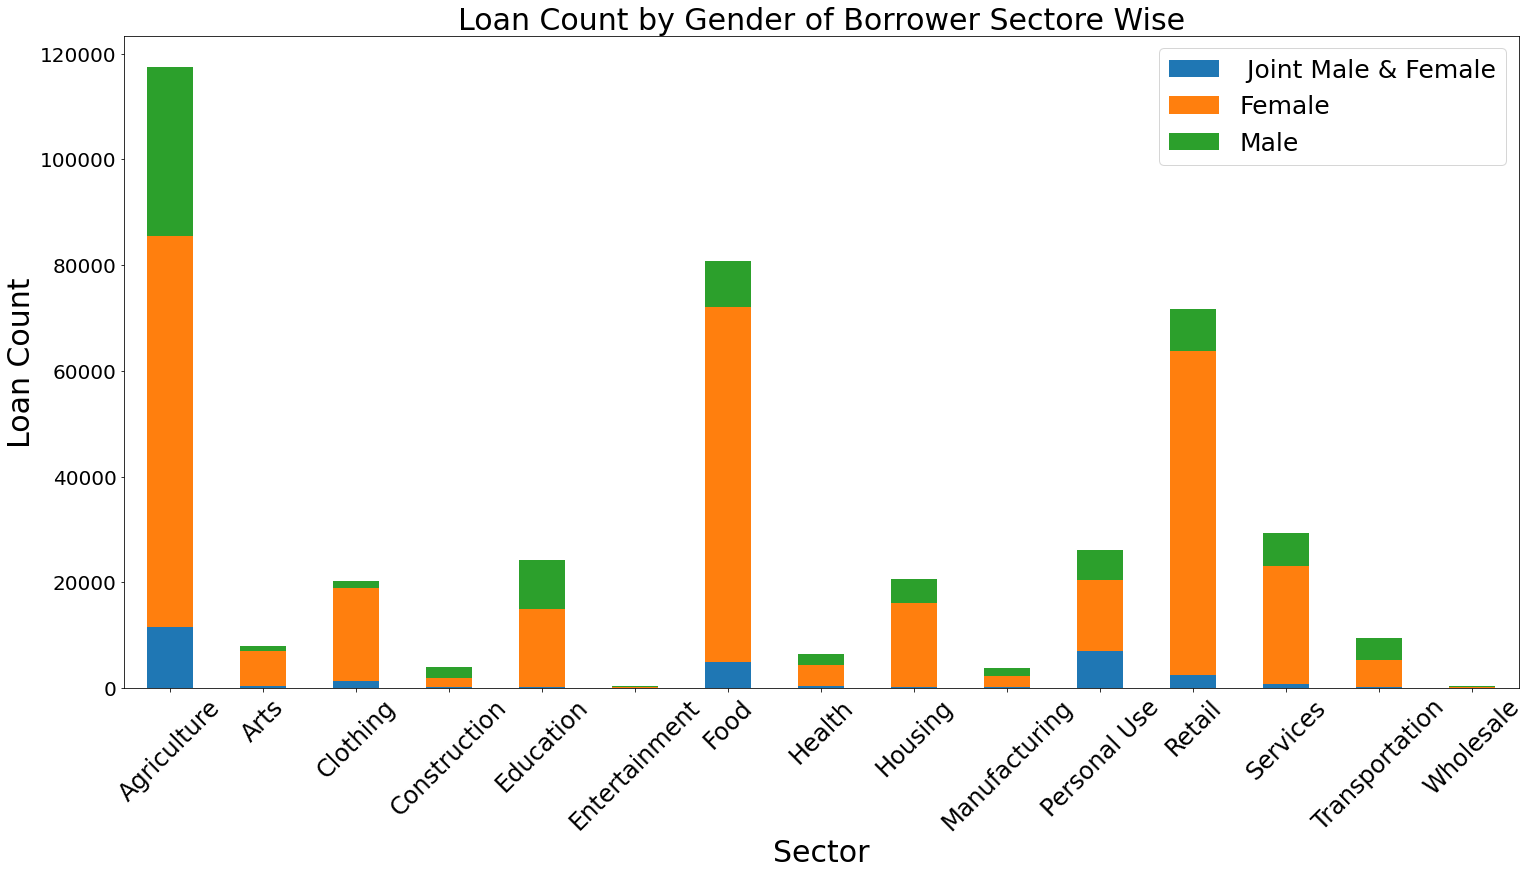

In [67]:
df_plot = kiva_loans.groupby(['sector', 'borrower_genders']).size().reset_index().pivot(columns='borrower_genders', index='sector', values=0)
df_plot.plot(kind='bar', stacked=True,figsize = (25,12))
plt.title('Loan Count by Gender of Borrower Sectore Wise',fontsize = 30)
plt.ylabel('Loan Count',fontsize = 30)
plt.xlabel('Sector',fontsize = 30)
plt.xticks(fontsize=24, rotation=45)
plt.yticks(fontsize=20)
plt.legend(fontsize=25)
plt.show()

### Sector Wise chart also indicates that Maximum loan is funded to Female.

# What are top activity in which Kiva loan is funded?

In [68]:
 kiva_loans.groupby('activity')['loan_amount'].sum().sort_values(ascending = False).reset_index().head(10)

,activity,loan_amount
0,Farming,35694800.0
1,General Store,21518825.0
2,Agriculture,16555250.0
3,Higher education costs,16429075.0
4,Clothing Sales,15851800.0
5,Personal Housing Expenses,13787750.0
6,Retail,13693550.0
7,Food Production/Sales,12810375.0
8,Livestock,10550300.0
9,Grocery Store,10067100.0


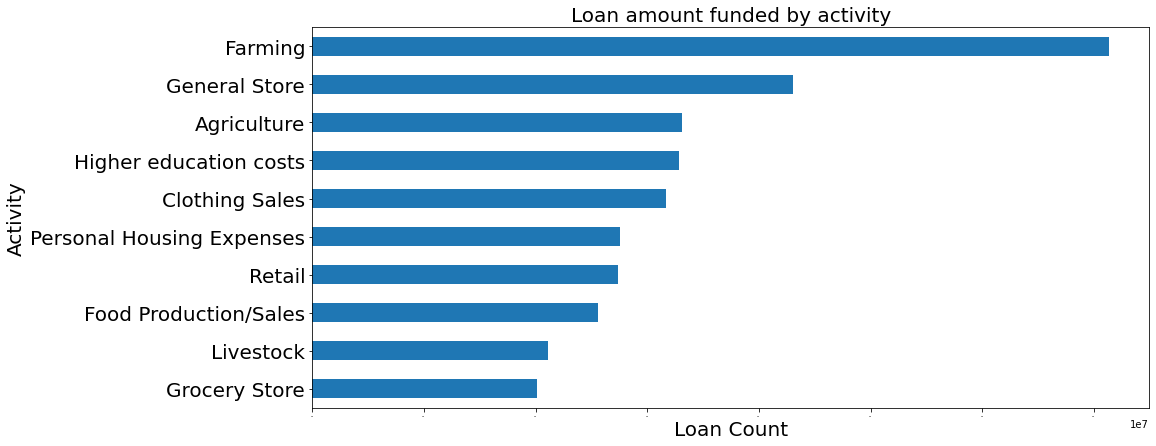

In [71]:
plt.figure(figsize=[15,7])
kiva_loans.groupby('activity')['loan_amount'].sum().sort_values().tail(10).plot.barh();
plt.xlabel('Loan Count',fontsize = 20)
plt.ylabel('Activity',fontsize = 20)
plt.title("Loan amount funded by activity",fontsize = 20);
plt.xticks(fontsize=2)
plt.yticks(fontsize=20)
plt.show()

### 1.Farming, 2. General Store, 3. Agriculture, 4. Food Production/Sales, 5. Retail, 6. Clothing Sales, 7. Personal Housing Expenses, 8. Higher education costs, 9. Grocery Store, 10. Livestock Are top 10 Loan amount funded by activity.

# Which are the top countries who funded maximum loan amount in Kiva?

In [70]:
kiva_loans.groupby('country').mean()['funded_amount'].sort_values(ascending = False).head(10)

country
Cote D'Ivoire         50000.000000
Benin                 25150.000000
Mauritania            15000.000000
Chile                 10465.000000
Bhutan                10000.000000
Afghanistan            7000.000000
Congo                  6155.637255
United States          4808.853354
Dominican Republic     4305.574324
Israel                 3827.542373
Name: funded_amount, dtype: float64

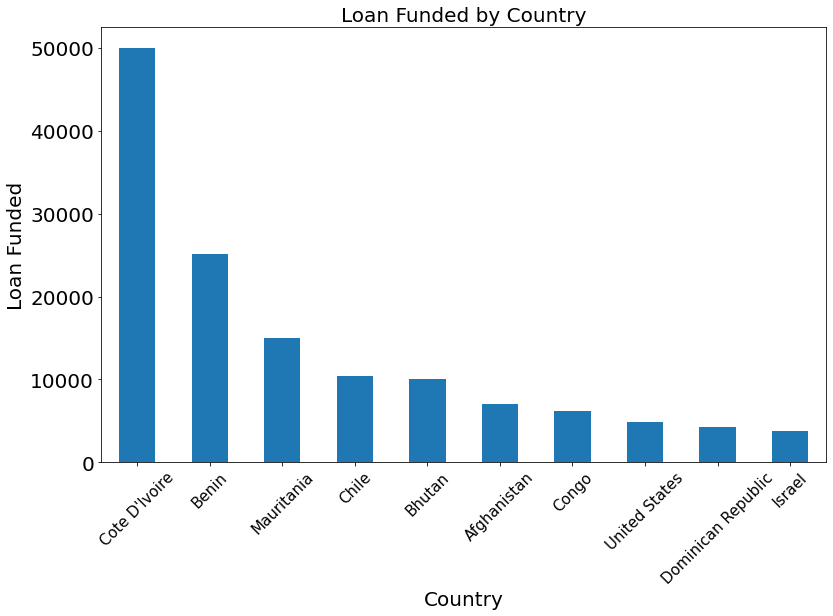

In [73]:
plt.figure(figsize=(13,8))
kiva_loans.groupby('country').mean()['funded_amount'].sort_values(ascending = False).head(10).plot.bar();
plt.ylabel('Loan Funded',fontsize = 20)
plt.xlabel('Country',fontsize = 20)
plt.title("Loan Funded by Country",fontsize = 20);
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=20)
plt.show()

### Cote D'Ivoire, Mauritania, Bhutan, Chile, Afghanistan, Congo, Puerto Rico, Dominican Republic, Namibia, United States Are top 10 Countries Who Funded Maximum Amount

# Does the Amount funded get affect by Count of lenders.

C:\Users\NishadPrashantK\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


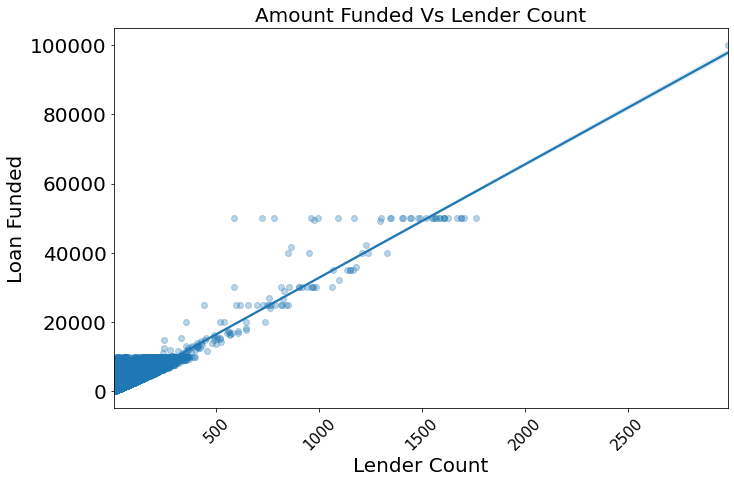

In [74]:
plt.figure(figsize=(11,7))
sns.regplot(kiva_loans['lender_count'],kiva_loans['funded_amount'],scatter_kws={'alpha':0.3})
plt.ylabel('Loan Funded',fontsize = 20)
plt.xlabel('Lender Count',fontsize = 20)
plt.title("Amount Funded Vs Lender Count",fontsize = 20);
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=20)
plt.show()
plt.show()

### There is a positive Association between lender_count and funded_amount.
### We can see there is a high density in between 0-20000 Funded Amount and 0-500 lender count so we can colude from this that maximum funded amount is between 0-20000

# Analysis Kiva Funding in India

In [75]:
kiva_india = kiva_loans[kiva_loans.country == 'India']

In [76]:
kiva_india.head()

,index,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,...,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,...,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",Female,bullet,2014-01-01
1,6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,...,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",Female,bullet,2014-01-01
5,14,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,IN,India,Dhupguri,...,334.0,2014-01-01 11:24:40+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:58:18+00:00,43.0,7,user_favorite,Female,bullet,2014-01-01
7,18,653066,250.0,250.0,Sewing,Services,to purchase a sewing machine.,IN,India,Maynaguri,...,334.0,2014-01-01 09:48:35+00:00,2013-12-13 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,4,"user_favorite, user_favorite",Female,bullet,2014-01-01
9,26,653069,250.0,250.0,Construction Supplies,Construction,to purchase stones for starting a business sup...,IN,India,Maynaguri,...,334.0,2014-01-01 10:04:17+00:00,2013-12-10 08:00:00+00:00,2014-01-01 22:12:43+00:00,43.0,10,"user_favorite, user_favorite",Female,bullet,2014-01-01


# Which is the most popular sectors in India were maximum amount of loans are taken?

In [77]:
kiva_india.groupby('sector')['loan_amount'].sum().sort_values(ascending = False).reset_index().head(10)

,sector,loan_amount
0,Agriculture,1304925.0
1,Food,812200.0
2,Housing,590875.0
3,Services,438700.0
4,Arts,422475.0
5,Retail,370325.0
6,Education,280800.0
7,Clothing,204450.0
8,Manufacturing,125000.0
9,Personal Use,83700.0


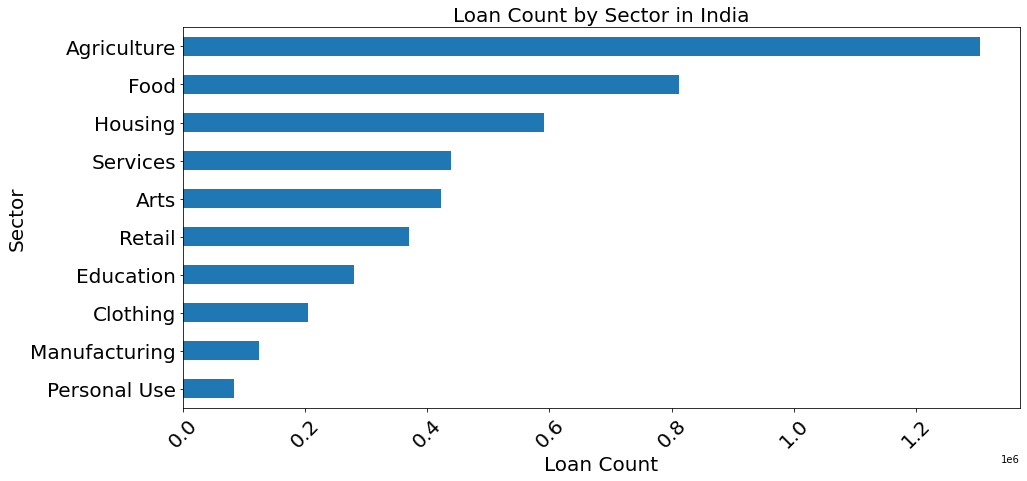

In [86]:
plt.figure(figsize=[15,7])
kiva_india.groupby('sector')['loan_amount'].sum().sort_values().tail(10).plot.barh();
plt.xlabel('Loan Count',fontsize = 20)
plt.ylabel('Sector',fontsize = 20)
plt.title("Loan Count by Sector in India",fontsize = 20);
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()

### Agriculture, Food, Housing, Retail, Services, Arts, Education, Clothing, Manufacturing, Personal Use are the top 10 Loan Amount Funded by Sector In India

# Which regions in India received highest count of loans?

In [79]:
kiva_india.groupby('region').id.count().sort_values(ascending=False).head(10)

region
Falakata           498
Khurda             330
Jeypore, Odisha    323
Surendranagar      257
Kandi              241
Dhupguri           216
Jaipur             196
Jhabua             184
Rayagada           169
Dahod              154
Name: id, dtype: int64

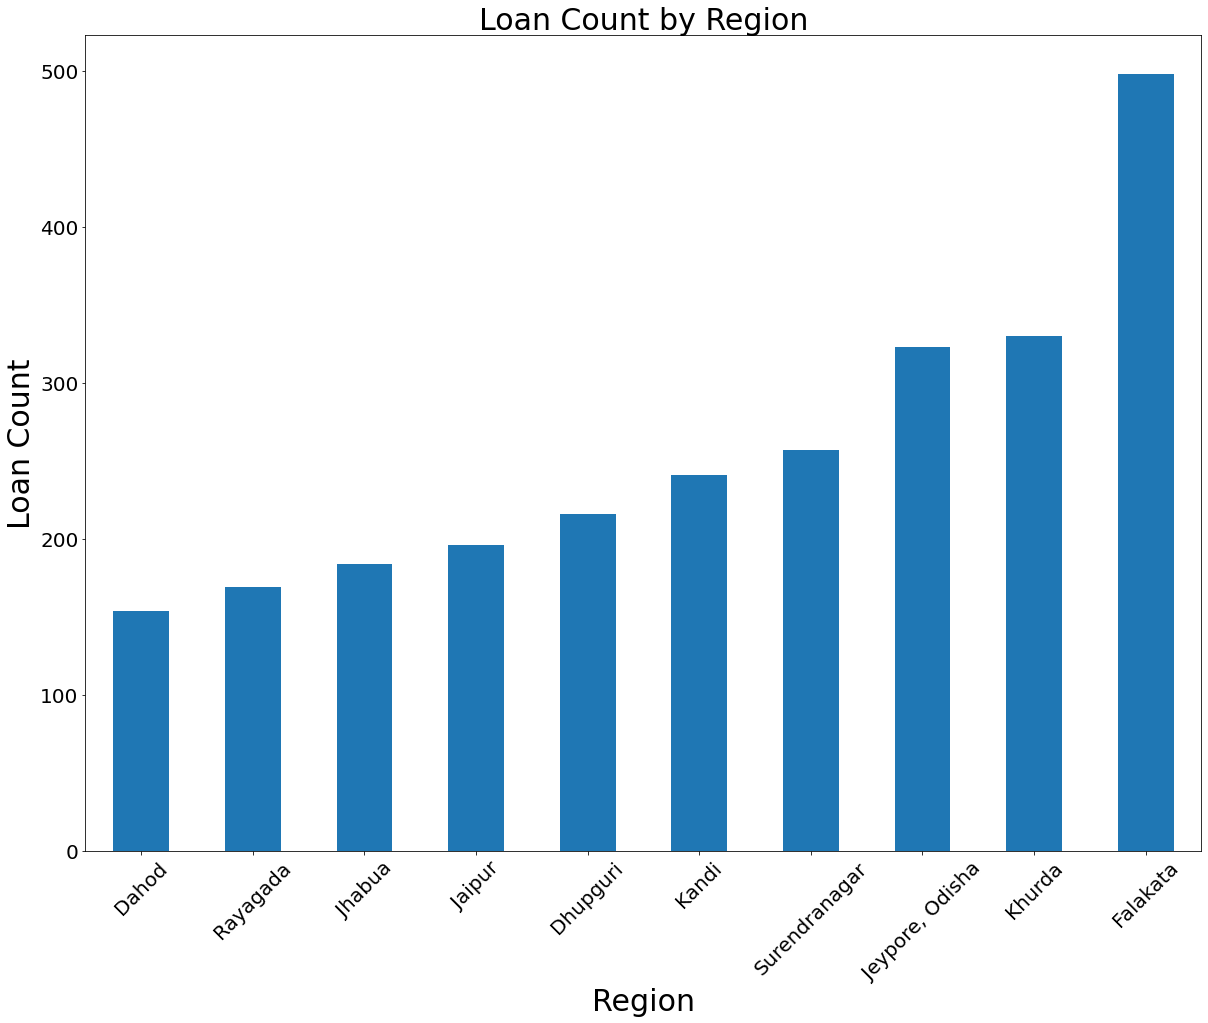

In [85]:
plt.figure(figsize=[20,15])
kiva_india.groupby('region').id.count().sort_values().tail(10).plot.bar();
plt.xlabel('Region',fontsize=30)
plt.ylabel('Loan Count',fontsize=30)
plt.title("Loan Count by Region",fontsize=30);
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()

### Dhupguri,Falakata,Maynaguri,Jeypore,Khurda,Kandi,Surendranagar,Dahod,Jhabua,Jaipur are the Top 10 regions receiving loans.

## Reading MPI dataset by Kiva.Org

In [81]:
kiva_mpi= pd.read_csv('kiva_mpi_region_locations.csv')
kiva_mpi

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
...,...,...,...,...,...,...,...,...,...
2767,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2768,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2769,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN
2770,NaN,NaN,NaN,NaN,NaN,NaN,"(1000.0, 1000.0)",NaN,NaN


### **This file contains records from the Kiva Data Snapshot and can be matched to the loan theme regions to get a loan’s location.**<br>

Column descriptions:<br>

id: Unique ID for loan (Loan ID)<br>
Loan Theme ID: Unique ID for loan theme<br>
Loan Theme Type: General description of the loan theme category<br>
Partner ID: Unique ID for field partners (Partner ID)<br>
MPI: Global Multidimensional Poverty Index<br>
geo : Location<br>
lat : Latitude<br>
lon : Longitude<br>

In [82]:
kiva_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


# Which country is having highest mean MPI ?

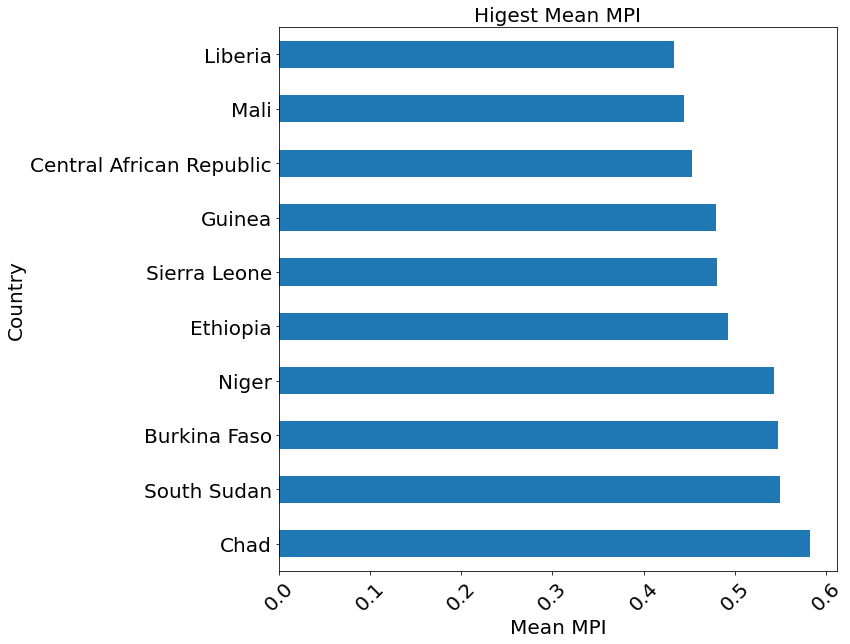

In [84]:
plt.figure(figsize = (10,10))
kiva_mpi.groupby('country').mean()['MPI'].sort_values(ascending = False).nlargest(10).plot.barh();
plt.ylabel('Country',fontsize=20)
plt.xlabel('Mean MPI',fontsize=20)
plt.title("Higest Mean MPI",fontsize=20);
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()

### The MPI Means Global Multidimensional Poverty Index so we can see Chad Country in Central Africa is having Higest Mean MPI so it is indicates a higher level of poverty

# END